<a href="https://colab.research.google.com/github/Waves-Matter/MLC/blob/main/MCL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import random
import math 
from math import pi, log, exp
import numpy as np
from numpy import unravel_index
from numpy import asarray
import cv2
import imageio

from sklearn.metrics import mean_squared_error

In [ ]:
img = Image.open('/content/gdrive/My Drive/Paskaitos/Ch_board2.png')
#img = Image.open('/content/gdrive/My Drive/Paskaitos/maze.png')

pix = img.load()
print(img.size)  # Get the width and hight of the image for iterating over
in_p=1/(img.size[0]*img.size[1])
arr=np.full(img.size, in_p)
print("---")
print(in_p)
print(arr.shape)
print("---")

print("---")
print(pix[0,10])# Get the RGBA Value of the a pixel of an image

(629, 629)
---
2.5275439097565722e-06
(629, 629)
---
---
(255, 255, 255, 255)


In [ ]:
def move(y,x, vy, vx, Original, ine):
    

    y=y+vy
    x=x+vx


    if(img.size[0]<y):
        temp=y-img.size[0]
        y=img.size[0]-temp
        vy=-vy
        if(Original==True and ine==True):
            vy=vy*abs(np.random.normal(1, 0.02))


    if(img.size[1]<x):
        temp=x-img.size[1]
        x=img.size[1]-temp
        vx=-vx
        if(Original==True and ine==True):
            vy=vy*abs(np.random.normal(1, 0.02))

    if(0>y):
        temp=0-y
        y=temp
        vy=-vy
        if(Original==True and ine==True):
            vx=vx*abs(np.random.normal(1, 0.02))

    if(0>x):
        temp=0-x
        x=temp
        vx=-vx
        if(Original==True and ine==True):
            vx=vx*abs(np.random.normal(1, 0.02))

    return y,x,vy,vx

def spawn(v):
    spawn1=random.randint(0, img.size[0])
    spawn2=random.randint(0, img.size[1])
    spawn_a=random.uniform(-math.pi, math.pi)
    vy=v*math.sin(spawn_a)
    vx=v*math.cos(spawn_a)
    return spawn1,spawn2,vy,vx

class Particle(object):
    def __init__(self, y, x, vy, vx):
        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy


def get_scan(y,x):
    b=10
    img_with_border = ImageOps.expand(img,border=b,fill='green')
    img_res = img_with_border.crop((x, y, x+b*2, y+b*2)) #im1 = im.crop((left, top, right, bottom))
    #imgs = img_res.convert('L')
    ur_mom = asarray(img_res)
    return ur_mom


def res(weights, particles): #resampling
    new_particles = []

    for i in range(len(particles)):
        n_part=np.random.choice(particles, p=weights2, replace=False)

        n_y=n_part.y*abs(np.random.normal(1, 0.02))
        n_x=n_part.x*abs(np.random.normal(1, 0.02))
        n_vy=n_part.vy*abs(np.random.normal(1, 0.01))
        n_vx=n_part.vx*abs(np.random.normal(1, 0.001))

        new_particles.append(Particle(n_y, n_x, n_vy, n_vx))
    return new_particles

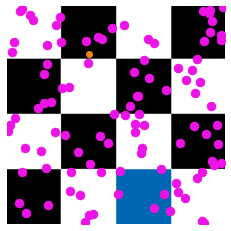

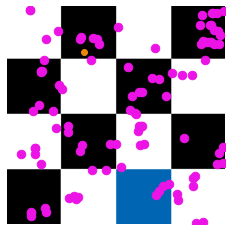

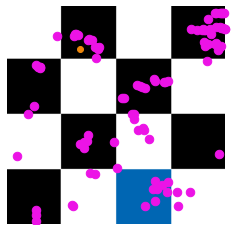

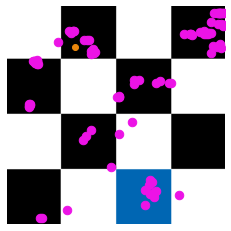

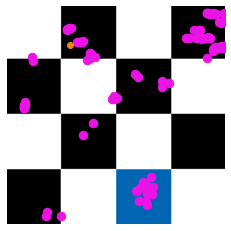

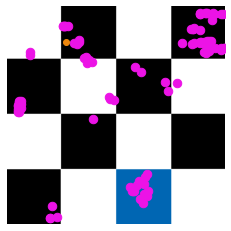

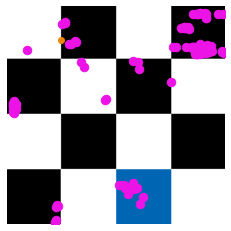

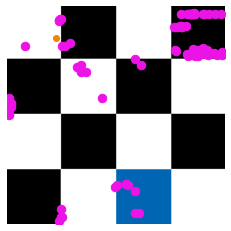

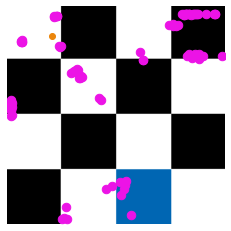

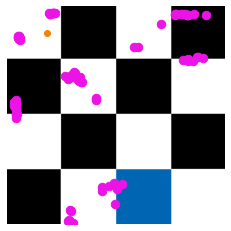

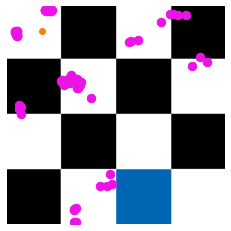

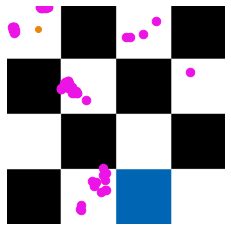

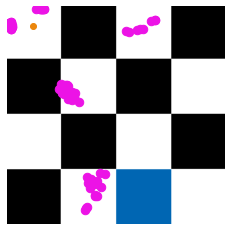

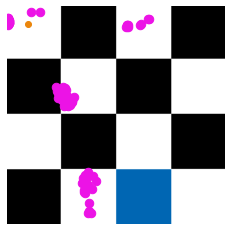

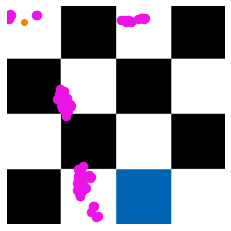

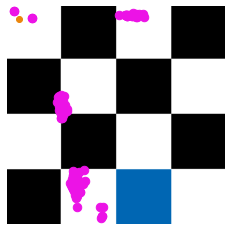

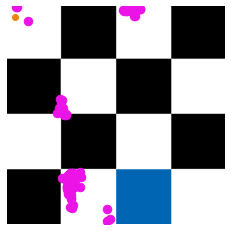

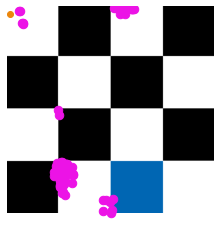

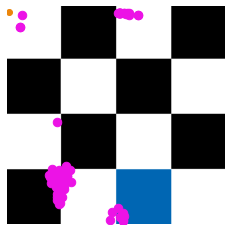

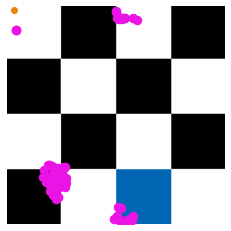

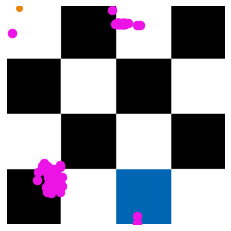

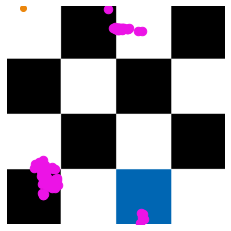

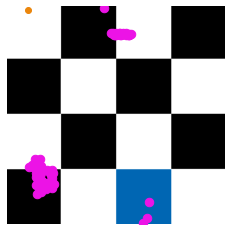

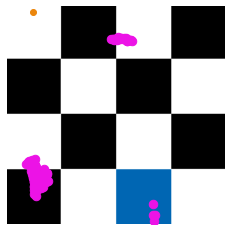

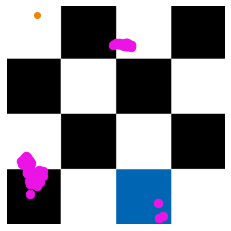

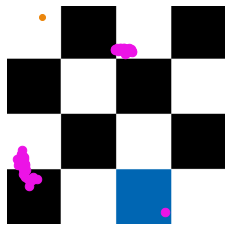

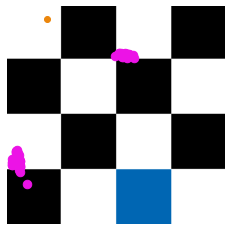

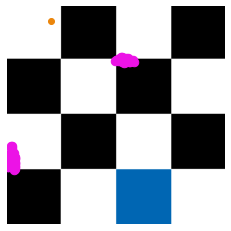

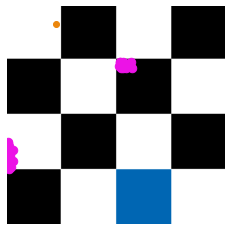

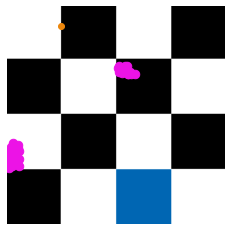

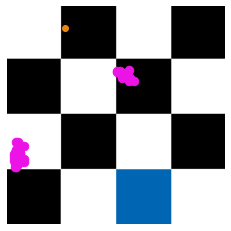

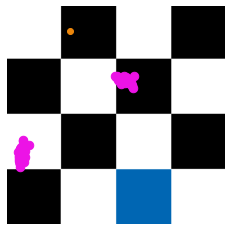

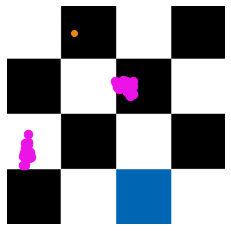

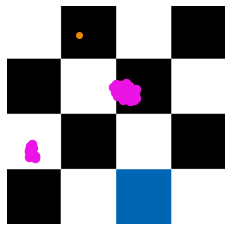

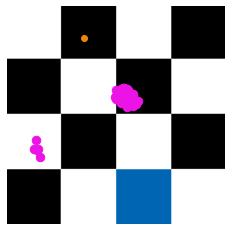

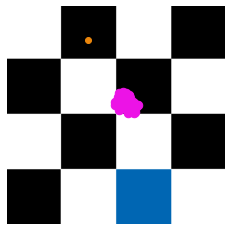

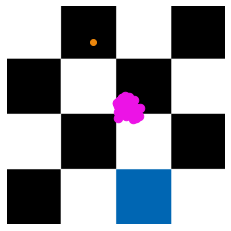

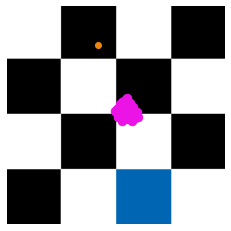

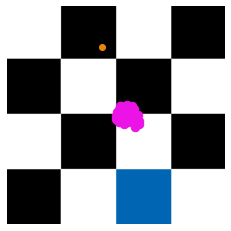

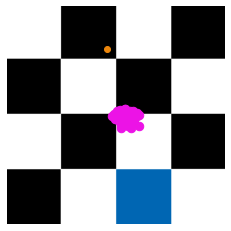

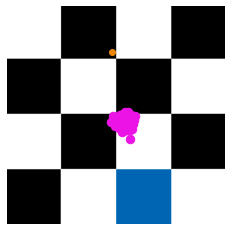

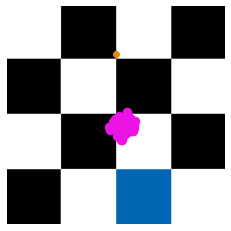

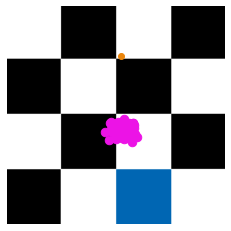

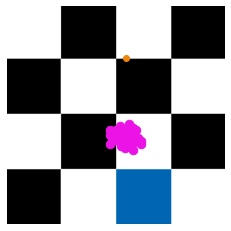

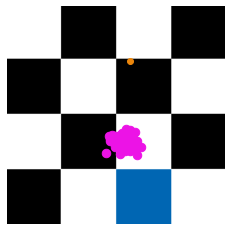

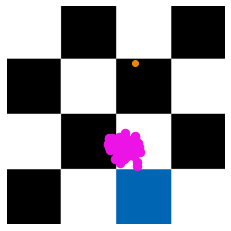

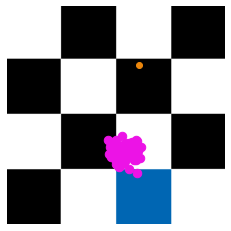

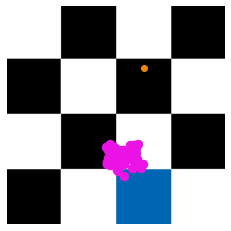

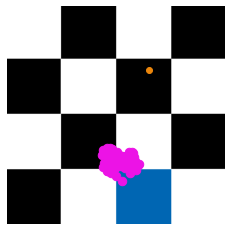

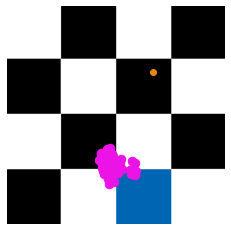

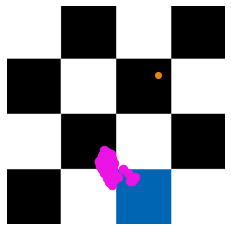

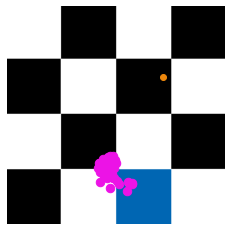

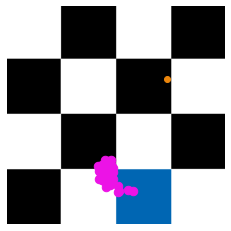

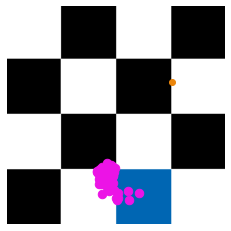

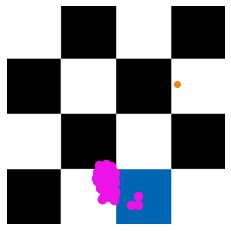

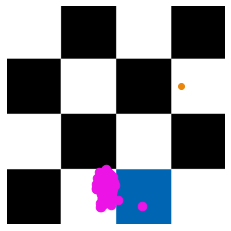

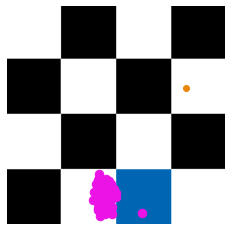

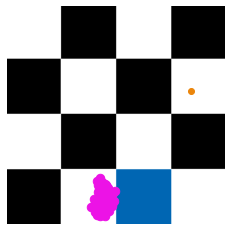

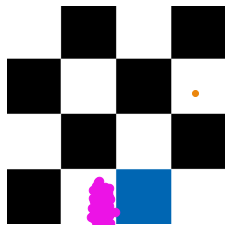

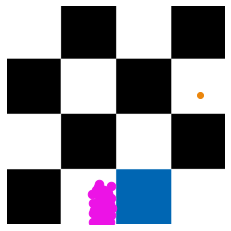

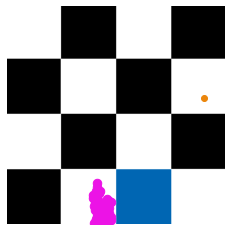

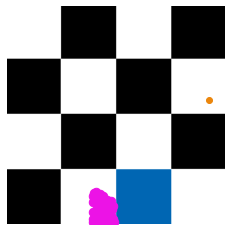

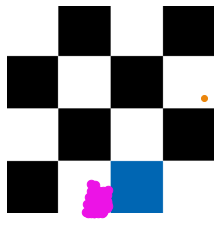

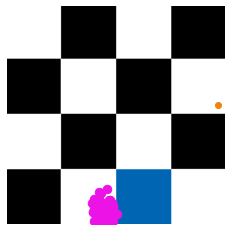

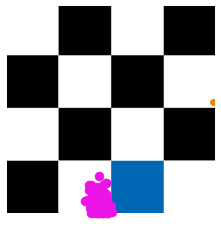

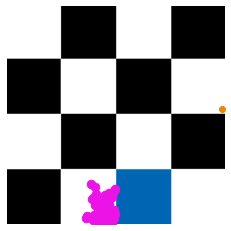

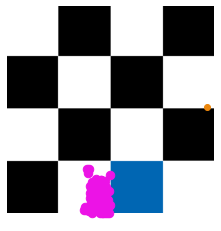

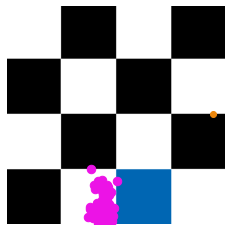

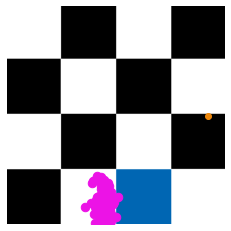

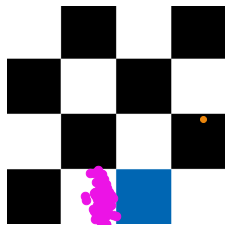

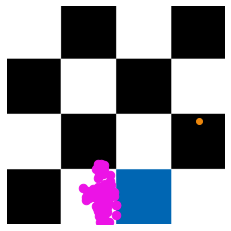

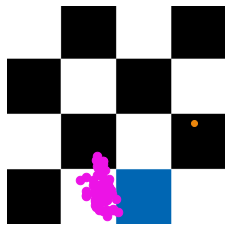

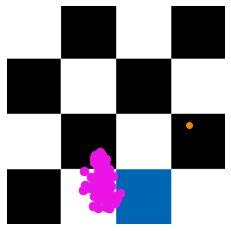

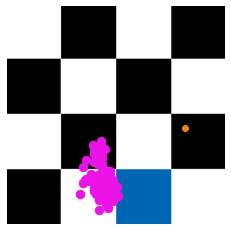

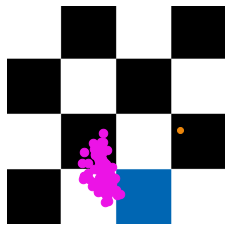

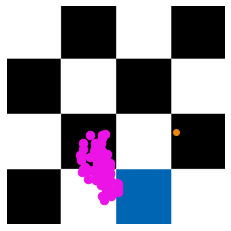

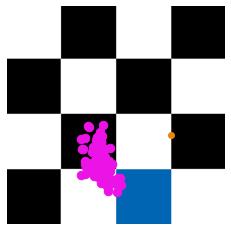

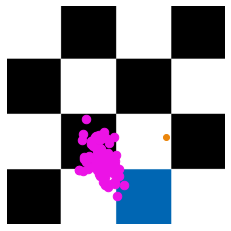

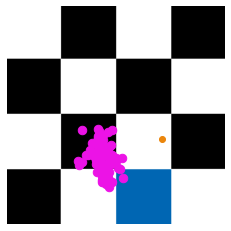

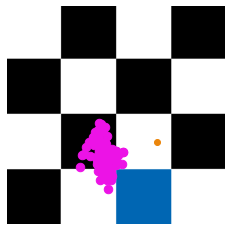

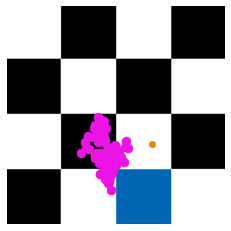

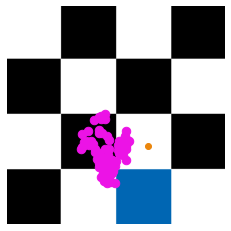

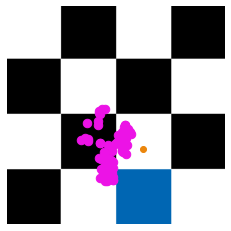

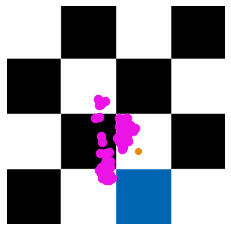

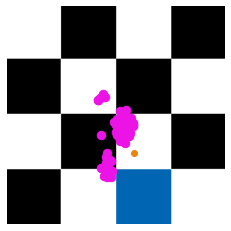

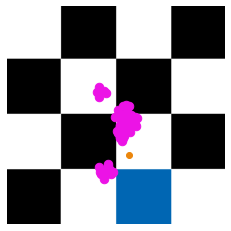

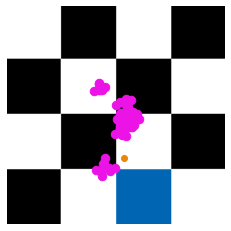

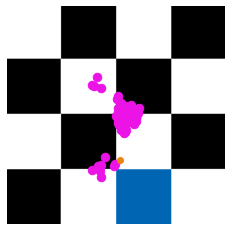

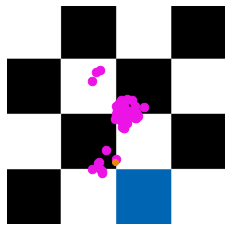

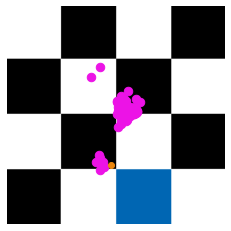

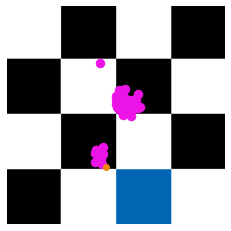

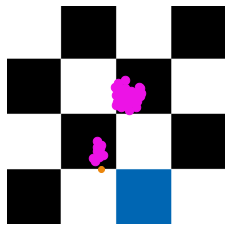

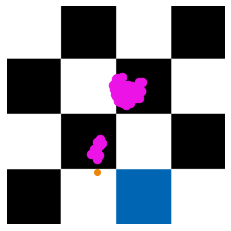

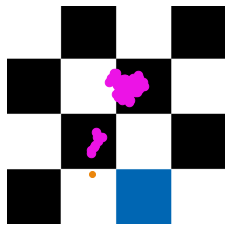

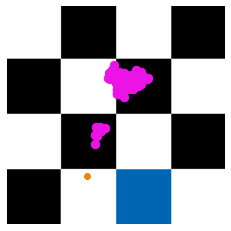

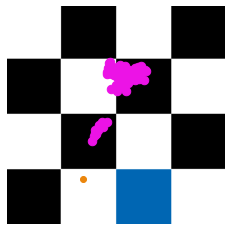

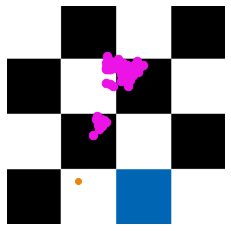

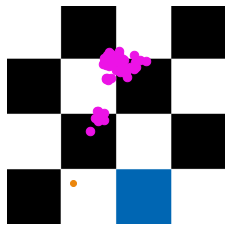

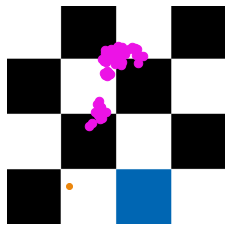

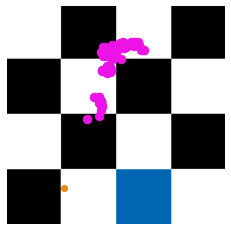

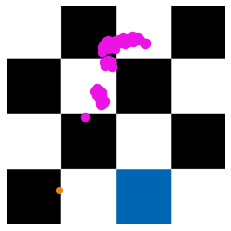

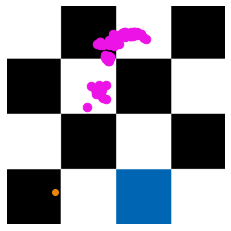

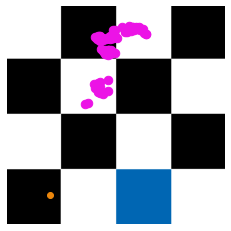

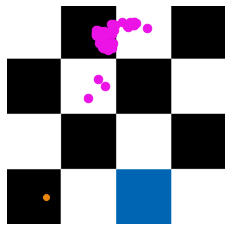

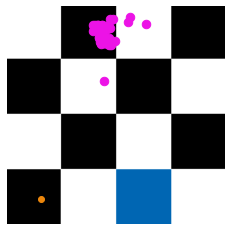

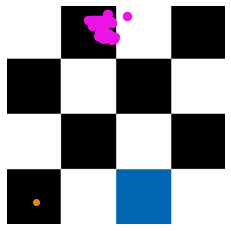

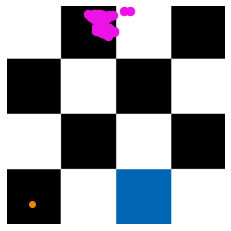

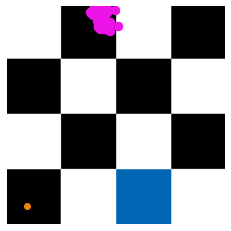

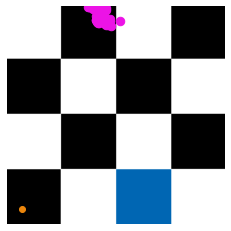

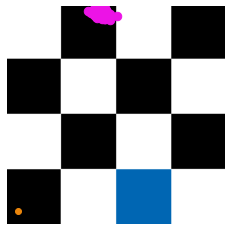

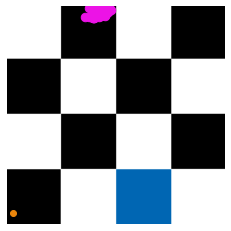

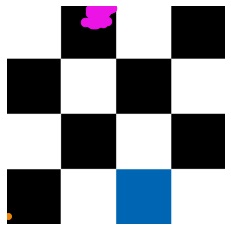

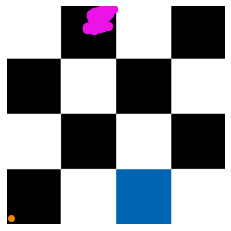

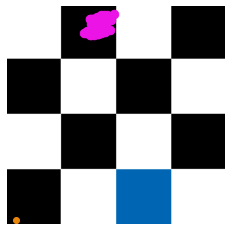

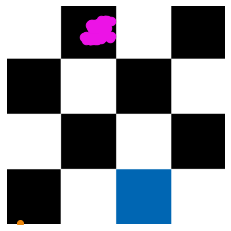

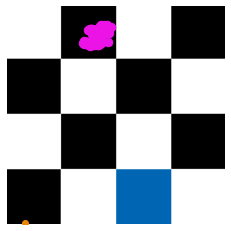

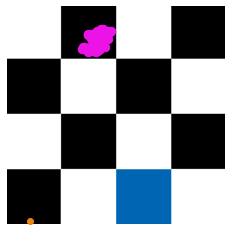

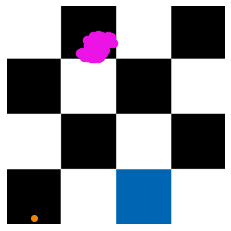

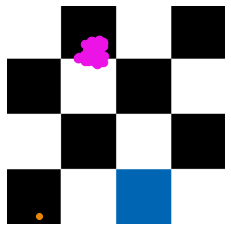

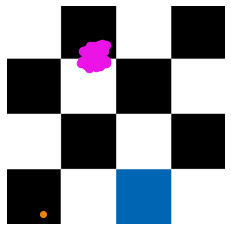

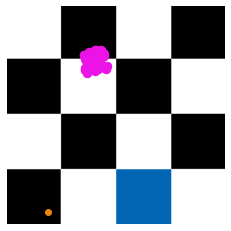

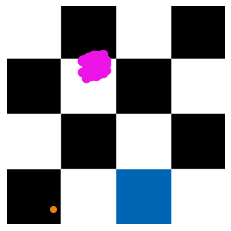

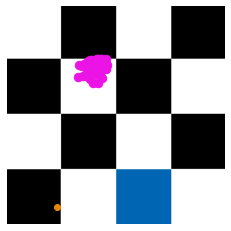

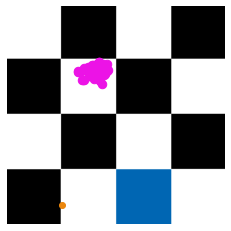

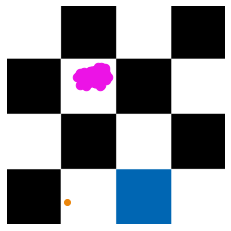

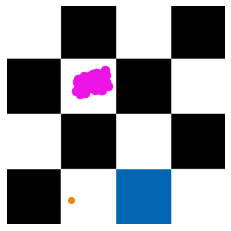

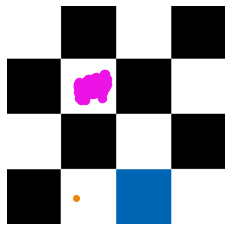

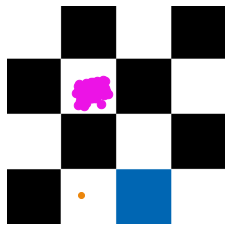

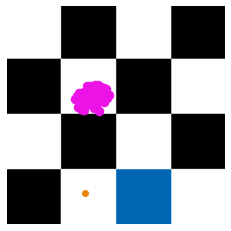

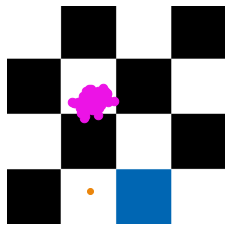

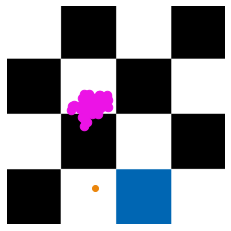

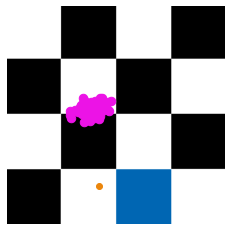

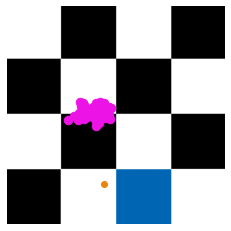

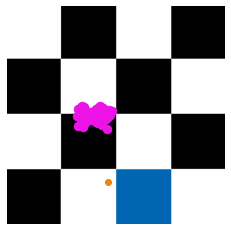

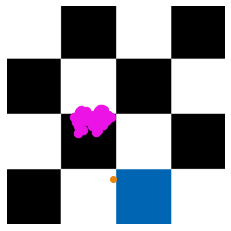

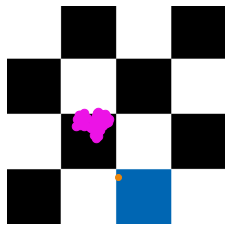

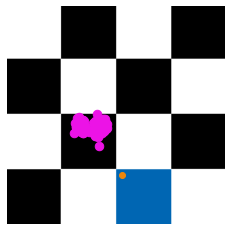

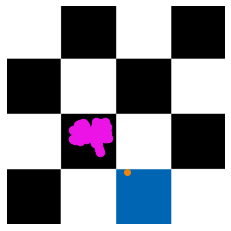

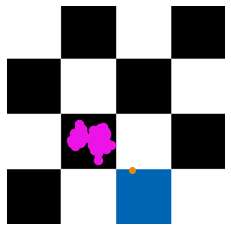

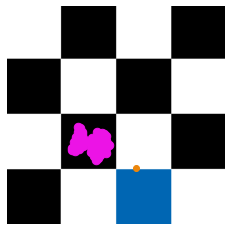

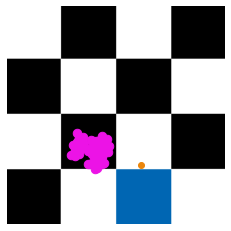

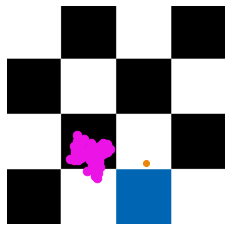

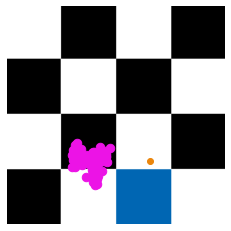

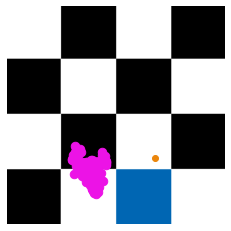

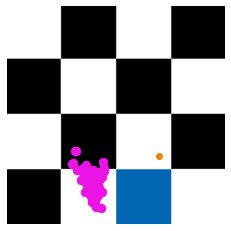

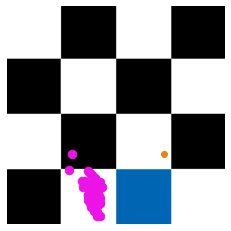

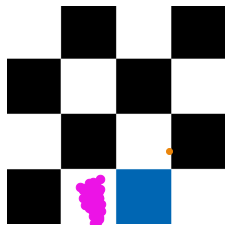

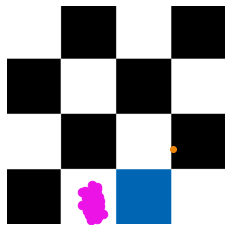

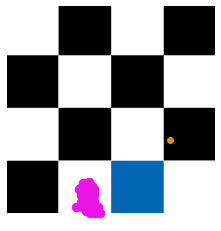

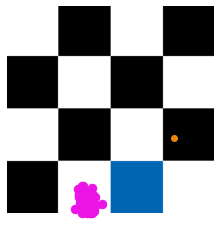

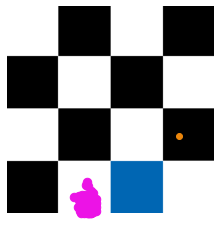

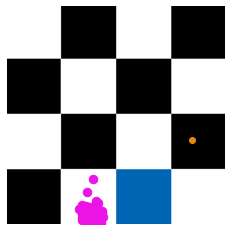

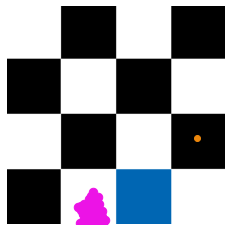

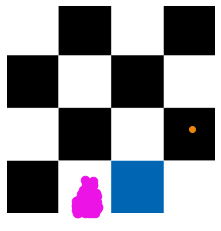

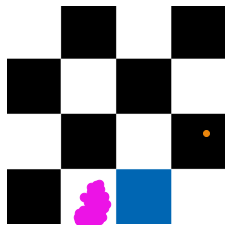

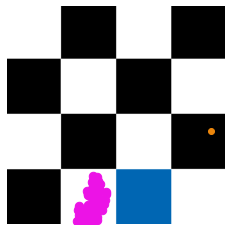

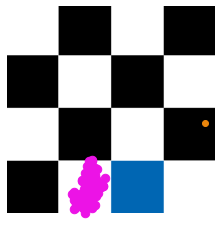

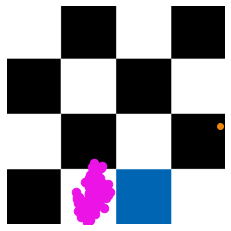

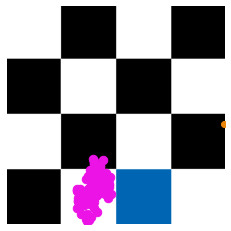

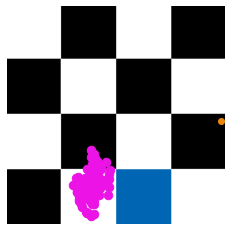

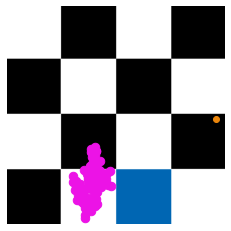

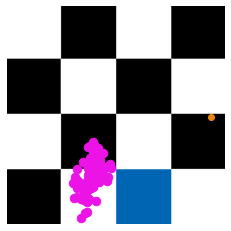

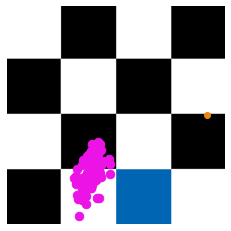

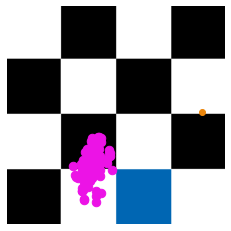

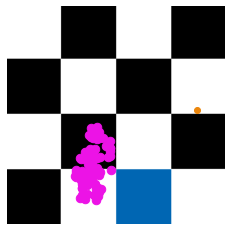

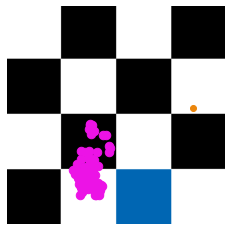

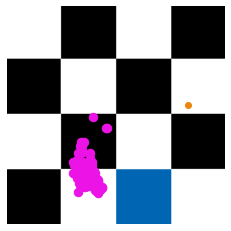

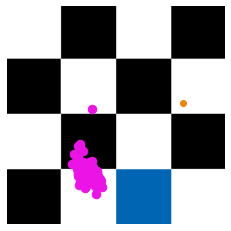

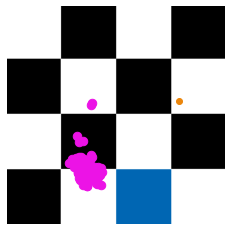

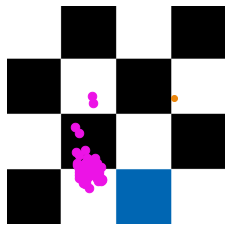

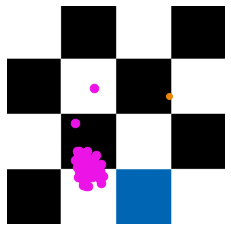

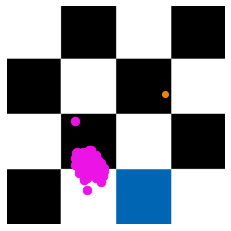

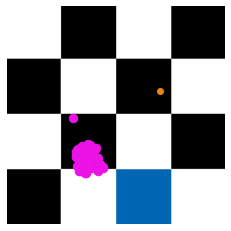

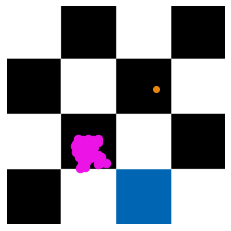

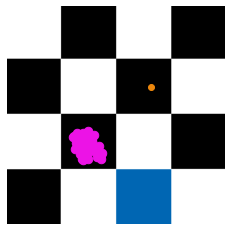

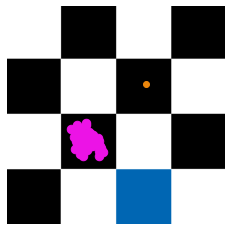

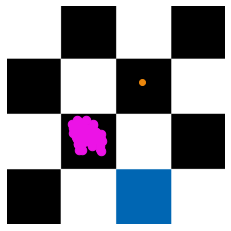

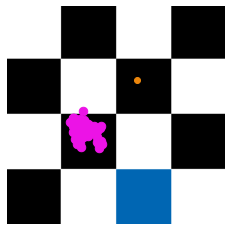

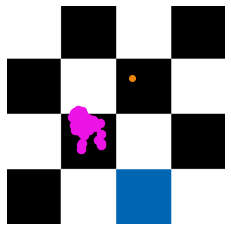

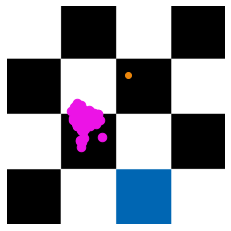

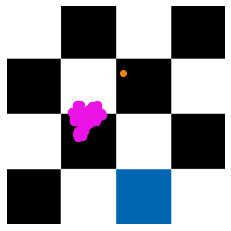

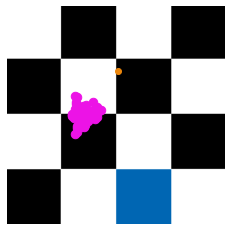

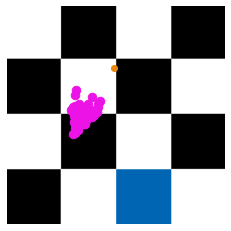

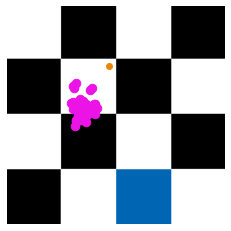

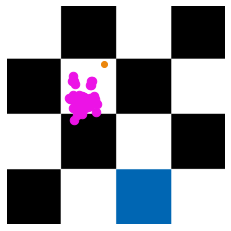

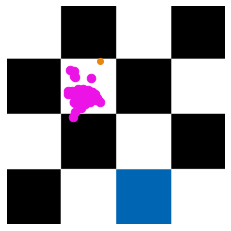

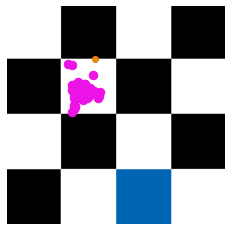

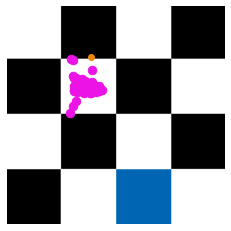

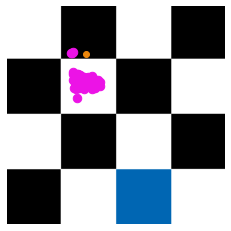

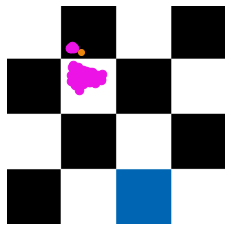

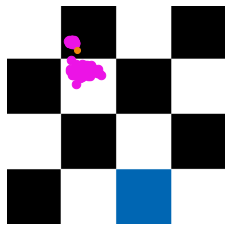

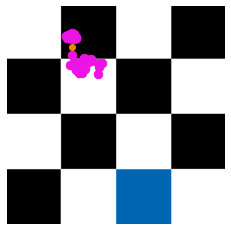

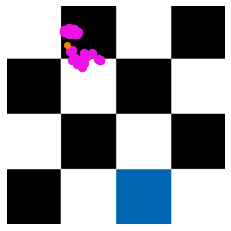

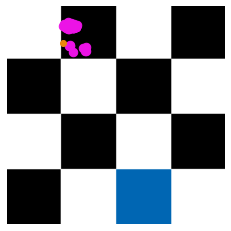

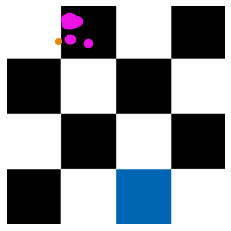

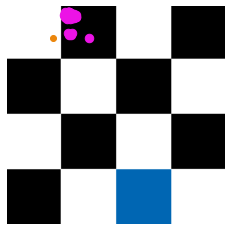

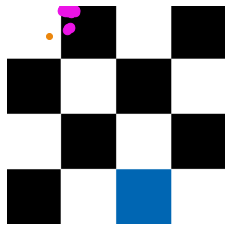

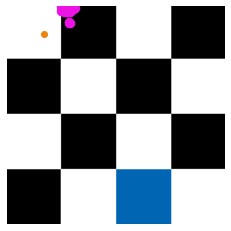

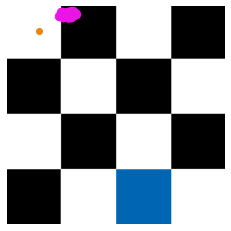

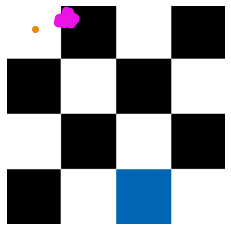

In [ ]:
errors=[]
particles=[]
p_n=100
v=15 #speed

inelastic=False

y,x,vx,vy=spawn(v) #true one

for i in range(p_n):
    n_y, n_x, n_vy, n_vx= spawn(v)
    particles.append(Particle(n_y, n_x, n_vy, n_vx))

a=0
g=True

for i in range(200):

    y, x, vy, vx=move(y,x,vy,vx, Original=True, ine=inelastic)
    current_scan=get_scan(int(y) , int(x))
    errors=[]
    weights=[]

    for p in particles:
        p.y, p.x, p.vy, p.vx= move(p.y, p.x, p.vy, p.vx, Original = False, ine = inelastic)
        # p.y = pred_y
        # p.x = pred_x
        # p.dy = pred_dy
        # p.dx = pred_dx
        
        pred_scan = get_scan(int(p.y),int(p.x))

        if(pred_scan==current_scan).all():
            w=0.7
        elif(pred_scan==current_scan).any():
            w=0.2
        else: w=0.05



#         mse = mean_squared_error(pred_scan, current_scan)
# #        print(mse)
#         errors.append(mse)

        weights.append(w)
    
    # errors = [float(i)/sum(errors) for i in errors]
    # weights = [exp(-error) for error in errors]


    
    if(True):
        plt.imshow(img)
        plt.plot(y,x, marker="o", c="#eb860c")
        plt.scatter([p.y for p in particles], [p.x for p in particles], s=72, c="#EC13E6", marker="o", )
        #fig.colorbar(im2)
        plt.axis("off")

        plt.savefig('/content/img_'+str(a)+'.png')
        plt.show()

    a=a+1
    weights2 = [float(n)/sum(weights) for n in weights]
    particles=res(weights2, particles)

frames = []
for i in range(a):
    image = imageio.imread('/content/img_'+str(i)+'.png')
    frames.append(image)

imageio.mimsave('/content/example.gif', 
                frames, 
                fps = 5)